# Smoking Cessation Model in ASDM

By Wang Zhao and Matt Stammers

- This is a recreation of the training Smoking Cessation model in ASDM.
- Version 1.1

It is not quite working yet due to a missing function (INIT) in ASDM but this will be patched soon.

You will need to install the dependencies as per the requirements.txt file for it to work properly. This should take a few minutes. Remember to run it in a virtual environment to avoid any conflicts

In [1]:
# Import key dependencies

from ASDM.Engine import Structure
from ASDM.Utilities import plot_time_series
from IPython.display import Image

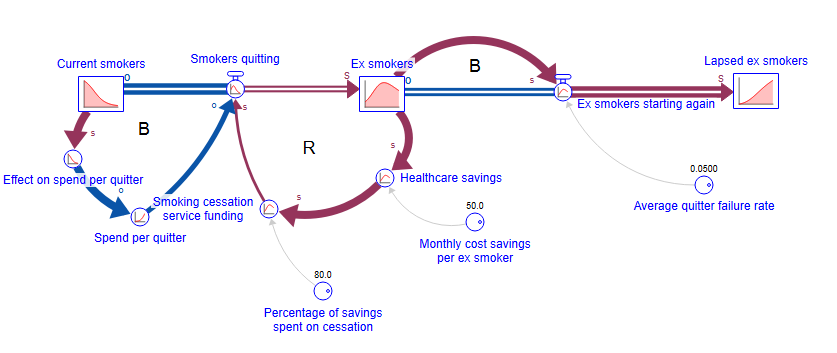

In [2]:
# Show image of final result

Image('Smoking_Cessation_Model.png')

In [11]:
# Add Variables to the Smoking Cessation SD Class object

class SmokingCessation(Structure):
    def __init__(self):
        super(SmokingCessation, self).__init__()
        self.add_stock("currentSmokers", 900)
        self.add_stock("exSmokers", 100)
        self.add_stock("lapsedExSmokers", 0)
        self.add_flow("smokersQuitting", "smokingCessationServiceFunding*spendPerQuitter", flow_from='currentSmokers', flow_to="exSmokers")        
        self.add_flow("exSmokersStartingAgain", "exSmokers*averageQuitterFailureRate", flow_from='exSmokers', flow_to="lapsedExSmokers")
        self.add_aux("effectOnSpendPerQuitter", "currentSmokers")
        self.add_aux("spendPerQuitter", "200/effectOnSpendPerQuitter")
        self.add_aux("percentageOfSavingsSpentOnCessation", 80)                
        self.add_aux("averageQuitterFailureRate", 0.05)
        self.add_aux("healthcareSavings", "exSmokers*monthlyCostSavingsPerExSmoker")
        self.add_aux("smokingCessationServiceFunding", "healthcareSavings*percentageOfSavingsSpentOnCessation/100")
        self.add_aux("monthlyCostSavingsPerExSmoker", 50)

In [12]:
# Create an instance of the model

smoking_model = SmokingCessation()
smoking_model.clear_last_run()
smoking_model.simulate(simulation_time=36, dt=0.25)

Engine: adding element: currentSmokers equation: 900
Engine: adding element: exSmokers equation: 100
Engine: adding element: lapsedExSmokers equation: 0
Engine: adding element: smokersQuitting equation: smokingCessationServiceFunding*spendPerQuitter
Engine: adding element: exSmokersStartingAgain equation: exSmokers*averageQuitterFailureRate
Engine: adding element: effectOnSpendPerQuitter equation: currentSmokers-1
Engine: adding element: spendPerQuitter equation: 200/effectOnSpendPerQuitter
Engine: adding element: percentageOfSavingsSpentOnCessation equation: 80
Engine: adding element: averageQuitterFailureRate equation: 0.05
Engine: adding element: healthcareSavings equation: exSmokers*monthlyCostSavingsPerExSmoker
Engine: adding element: smokingCessationServiceFunding equation: healthcareSavings*percentageOfSavingsSpentOnCessation/100
Engine: adding element: monthlyCostSavingsPerExSmoker equation: 50


In [13]:
# Export the Simulation Results

df_smoking_outcome = smoking_model.export_simulation_result()
df_smoking_outcome

,currentSmokers,exSmokers,lapsedExSmokers,smokersQuitting,exSmokersStartingAgain,effectOnSpendPerQuitter,spendPerQuitter,percentageOfSavingsSpentOnCessation,averageQuitterFailureRate,healthcareSavings,smokingCessationServiceFunding,monthlyCostSavingsPerExSmoker
0,900.000000,100.000000,0.000000,889.877642,5.000000,899.000000,0.222469,80,0.05,5.000000e+03,4.000000e+03,50
1,677.530590,321.219410,1.250000,3798.431768,16.060971,676.530590,0.295626,80,0.05,1.606097e+04,1.284878e+04,50
2,-272.077353,1266.812110,5.265243,-37112.183725,63.340605,-273.077353,-0.732393,80,0.05,6.334061e+04,5.067248e+04,50
3,9005.968579,-8027.068973,21.100394,-7131.235520,-401.353449,9004.968579,0.022210,80,0.05,-4.013534e+05,-3.210828e+05,50
4,10788.777458,-9709.539490,-79.237968,-7200.400288,-485.476975,10787.777458,0.018539,80,0.05,-4.854770e+05,-3.883816e+05,50
...,...,...,...,...,...,...,...,...,...,...,...,...
140,187409.450890,-77693.697661,-108715.753229,-3316.550445,-3884.684883,187408.450890,0.001067,80,0.05,-3.884685e+06,-3.107748e+06,50
141,188238.588502,-77551.664052,-109686.924450,-3295.905549,-3877.583203,188237.588502,0.001062,80,0.05,-3.877583e+06,-3.102067e+06,50
142,189062.564889,-77406.244638,-110656.320250,-3275.387874,-3870.312232,189061.564889,0.001058,80,0.05,-3.870312e+06,-3.096250e+06,50
143,189881.411857,-77257.513549,-111623.898308,-3254.996671,-3862.875677,189880.411857,0.001053,80,0.05,-3.862876e+06,-3.090301e+06,50


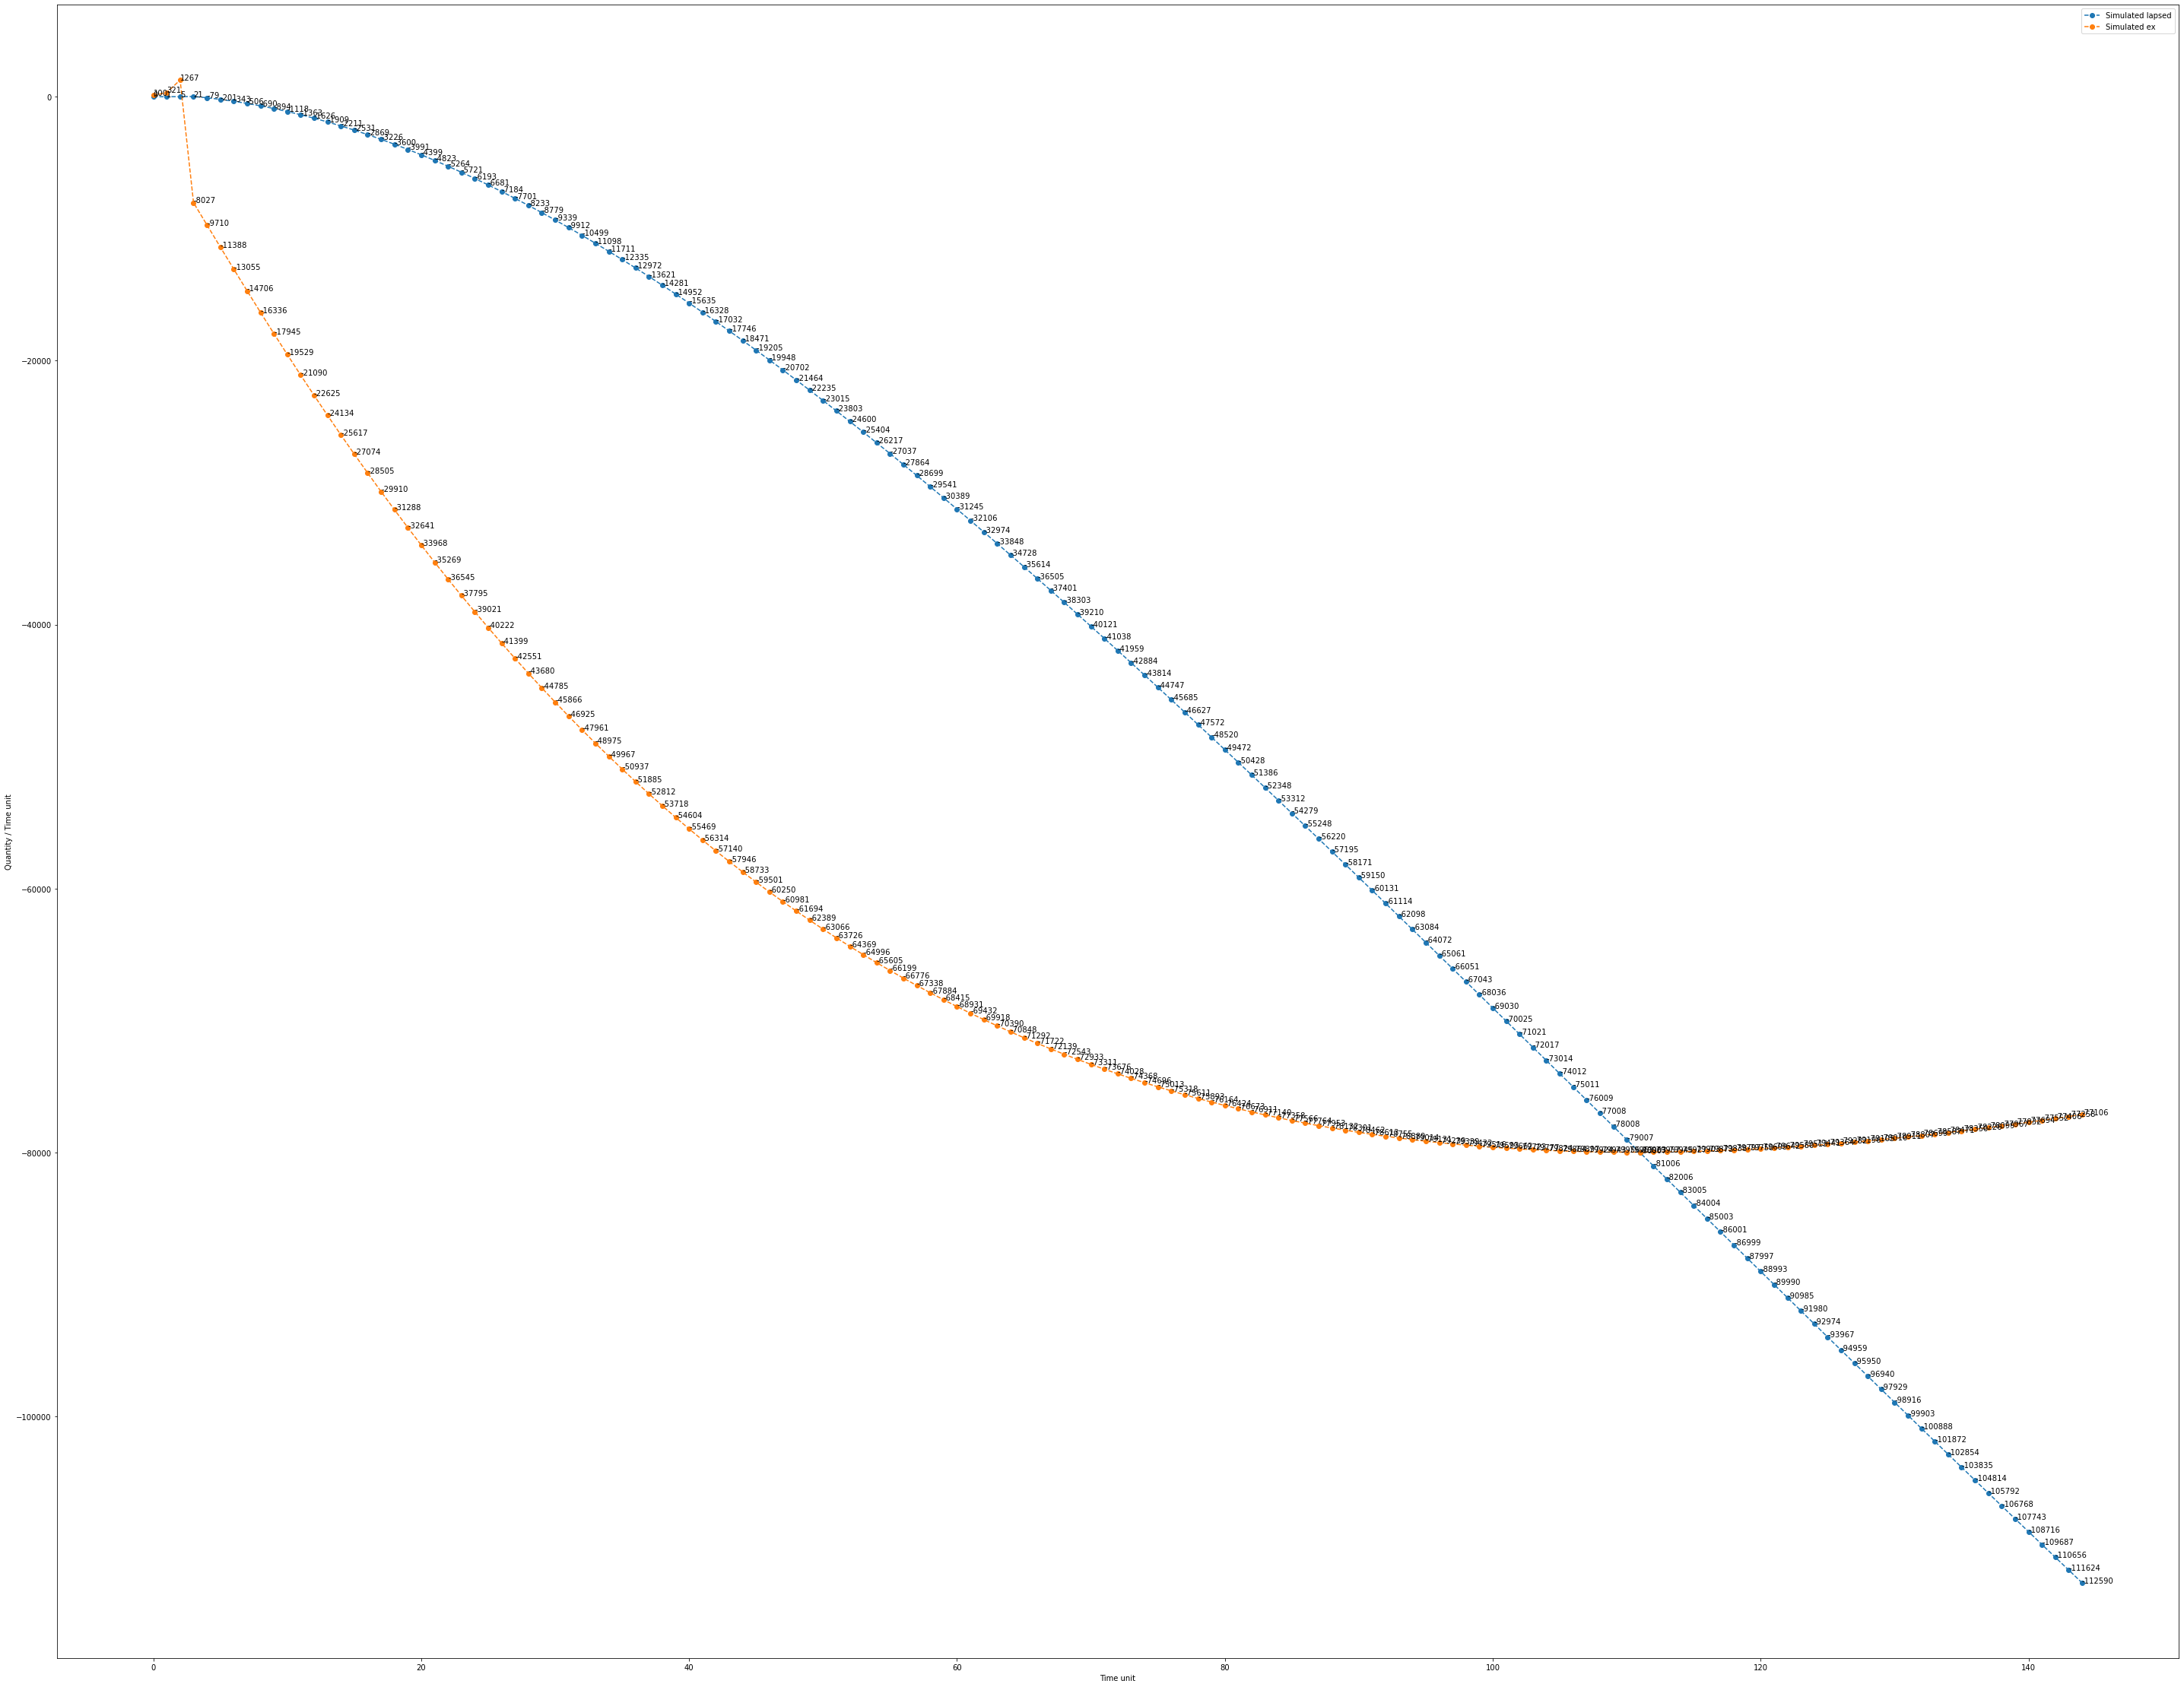

In [14]:
# Plot the time series output

plot_time_series({
    "lapsed":{"Simulated": df_smoking_outcome['lapsedExSmokers']},
    "ex":{"Simulated": df_smoking_outcome['exSmokers']},
}, separate_ax=False)